In [3]:
from nuscenes.nuscenes import NuScenes


def get_dataset_info1(nusc):
    scene_num = len(nusc.scene)
    sample_num = 0
    ann_num = 0

    for scene in nusc.scene:
        sample = None
        while True:
            if sample is None:
                sample = nusc.get('sample', scene['first_sample_token'])

            sample_num += 1
            ann_num += len(sample['anns'])

            if sample['next'] != '':
                sample = nusc.get('sample', sample['next'])
            else:
                break

    print('====== Start from scene')
    print('Scene Num: %d\nSample Num: %d\nAnnotation Num: %d' % (scene_num, sample_num, ann_num))


def get_dataset_info2(nusc):
    sample_num = len(nusc.sample)
    ann_num = 0

    scene_tokens = set()
    for sample in nusc.sample:
        ann_num += len(sample['anns'])

        scene = nusc.get('scene', sample['scene_token'])
        scene_tokens.add(scene['token'])
    scene_num = len(scene_tokens)

    print('====== Start from sample')
    print('Scene Num: %d\nSample Num: %d\nAnnotation Num: %d' % (scene_num, sample_num, ann_num))


def get_dataset_info3(nusc):
    ann_num = len(nusc.sample_annotation)

    scene_tokens = set()
    sample_tokens = set()
    for ann in nusc.sample_annotation:
        sample = nusc.get('sample', ann['sample_token'])
        sample_tokens.add(sample['token'])

        scene = nusc.get('scene', sample['scene_token'])
        scene_tokens.add(scene['token'])
    scene_num = len(scene_tokens)
    sample_num = len(sample_tokens)

    print('====== Start from annotation')
    print('Scene Num: %d\nSample Num: %d\nAnnotation Num: %d' % (scene_num, sample_num, ann_num))


### nuscenes数据介绍

In [4]:
nusc = NuScenes(version='v1.0-mini', dataroot="/Users/bruce/Downloads/datasets/v1.0-mini/", verbose=True)
get_dataset_info1(nusc)
get_dataset_info2(nusc)
get_dataset_info3(nusc)


Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.575 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
====== Start from scene
Scene Num: 10
Sample Num: 404
Annotation Num: 18538
====== Start from sample
Scene Num: 10
Sample Num: 404
Annotation Num: 18538
====== Start from annotation
Scene Num: 10
Sample Num: 404
Annotation Num: 18538


### 有10个场景

In [5]:
nusc.list_scenes()

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

'token': 唯一标识<br/>
'log_token': 日志标识<br/>
'nbr_samples': scenes场景中sample中的数量<br/>
'first_sample_token': 第一个token<br/>
'last_sample_token': 最后一个token<br/>
'name': 场景名字<br/>
'description': 场景描述<br/>

In [6]:
my_scene = nusc.scene[0]
my_scene

{'token': 'cc8c0bf57f984915a77078b10eb33198',
 'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'nbr_samples': 39,
 'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0',
 'name': 'scene-0061',
 'description': 'Parked truck, construction, intersection, turn left, following a van'}

In [7]:
first_sample_token = my_scene['first_sample_token']
first_sample_token

'ca9a282c9e77460f8360f564131a8af5'

In [8]:
my_sample = nusc.get('sample', first_sample_token)
my_sample['anns'].__len__()

69

In [9]:
my_sample

{'token': 'ca9a282c9e77460f8360f564131a8af5',
 'timestamp': 1532402927647951,
 'prev': '',
 'next': '39586f9d59004284a7114a68825e8eec',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
  'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
  'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
  'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
  'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
  'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
  'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
  'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
  'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
  'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
  'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
  'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
 'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319

sample的data数据，表示12个传感器<br/>
6个相机，1个激光雷达，5个毫米波雷达

In [10]:
my_sample['data']

{'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
 'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
 'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
 'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
 'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
 'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
 'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
 'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
 'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
 'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
 'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
 'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'}

In [11]:
nusc.list_sample(my_sample['token'])

Sample: ca9a282c9e77460f8360f564131a8af5

sample_data_token: 37091c75b9704e0daa829ba56dfa0906, mod: radar, channel: RADAR_FRONT
sample_data_token: 11946c1461d14016a322916157da3c7d, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: 491209956ee3435a9ec173dad3aaf58b, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: 312aa38d0e3e4f01b3124c523e6f9776, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 07b30d5eb6104e79be58eadf94382bc1, mod: radar, channel: RADAR_BACK_RIGHT
sample_data_token: 9d9bf11fb0e144c8b446d54a8a00184f, mod: lidar, channel: LIDAR_TOP
sample_data_token: e3d495d4ac534d54b321f50006683844, mod: camera, channel: CAM_FRONT
sample_data_token: aac7867ebf4f446395d29fbd60b63b3b, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: 79dbb4460a6b40f49f9c150cb118247e, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 03bea5763f0f4722933508d5999c5fd8, mod: camera, channel: CAM_BACK
sample_data_token: 43893a033f9c46d4a51b5e08a67a1eb7, mod: camera, channel:

### 可视化雷达数据进行查看

In [12]:
sensor_radar = "RADAR_FRONT"
radar_front_data = nusc.get('sample_data', my_sample['data'][sensor_radar])
radar_front_data

{'token': '37091c75b9704e0daa829ba56dfa0906',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': '37091c75b9704e0daa829ba56dfa0906',
 'calibrated_sensor_token': 'f4d2a6c281f34a7eb8bb033d82321f79',
 'timestamp': 1532402927664178,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/RADAR_FRONT/n015-2018-07-24-11-22-45+0800__RADAR_FRONT__1532402927664178.pcd',
 'prev': '',
 'next': 'f0b8593e08594a3eb1152c138b312813',
 'sensor_modality': 'radar',
 'channel': 'RADAR_FRONT'}

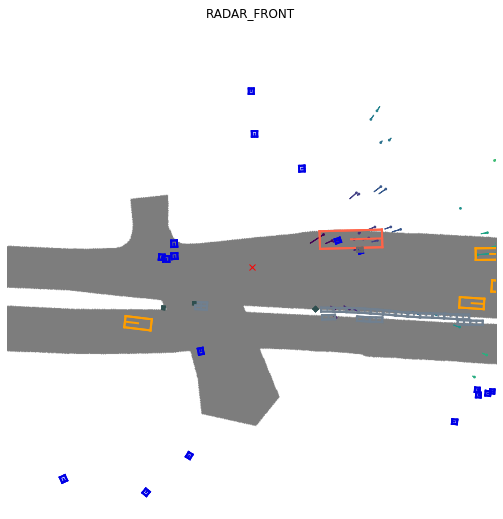

In [13]:
nusc.render_sample_data(radar_front_data['token'])

### 图片可视化-前视图

In [14]:
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data

{'token': 'e3d495d4ac534d54b321f50006683844',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': 'e3d495d4ac534d54b321f50006683844',
 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1',
 'timestamp': 1532402927612460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg',
 'prev': '',
 'next': '68e8e98cf7b0487baa139df808641db7',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

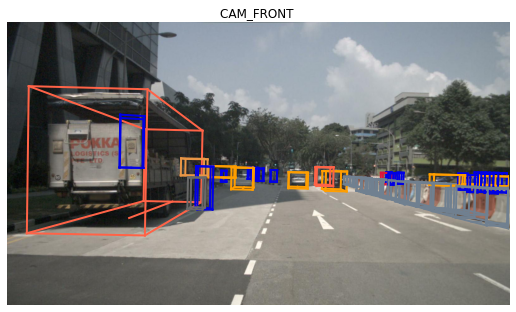

In [15]:
nusc.render_sample_data(cam_front_data['token'])

In [16]:
cam_front_data

{'token': 'e3d495d4ac534d54b321f50006683844',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': 'e3d495d4ac534d54b321f50006683844',
 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1',
 'timestamp': 1532402927612460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg',
 'prev': '',
 'next': '68e8e98cf7b0487baa139df808641db7',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

### 可视化后视图进行观察

In [17]:
sensor = 'CAM_BACK'
cam_back_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_back_data

{'token': '03bea5763f0f4722933508d5999c5fd8',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': '03bea5763f0f4722933508d5999c5fd8',
 'calibrated_sensor_token': '4ff47c4950f04cb4be1876bc0b028326',
 'timestamp': 1532402927637525,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_BACK/n015-2018-07-24-11-22-45+0800__CAM_BACK__1532402927637525.jpg',
 'prev': '',
 'next': '39c5557eadb443f2bfc8698605b1967a',
 'sensor_modality': 'camera',
 'channel': 'CAM_BACK'}

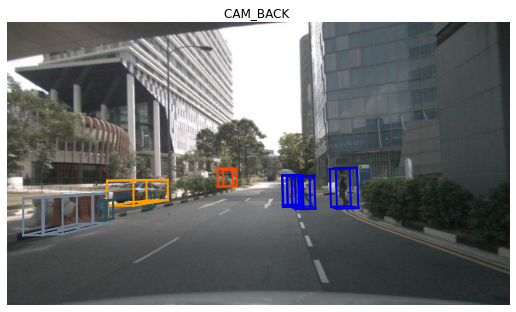

In [18]:
nusc.render_sample_data(cam_back_data['token'])

In [19]:
my_sample['anns'].__len__()

69

In [20]:
my_annotation_token = my_sample['anns'][60]
my_annotation_metadata = nusc.get('sample_annotation',my_annotation_token)
my_annotation_metadata


{'token': 'ca0f85b4f0d44beb9b7ff87b1ab37ff5',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'instance_token': '963c99d31d0447acb45808d3452af0e8',
 'visibility_token': '1',
 'attribute_tokens': [],
 'translation': [407.962, 1190.975, 0.711],
 'size': [1.908, 0.579, 1.051],
 'rotation': [-0.9788566800328594, 0.0, 0.0, 0.2045473049322537],
 'prev': '',
 'next': 'c558f6c905f14aaf834040c49ab65be9',
 'num_lidar_pts': 20,
 'num_radar_pts': 0,
 'category_name': 'movable_object.barrier'}

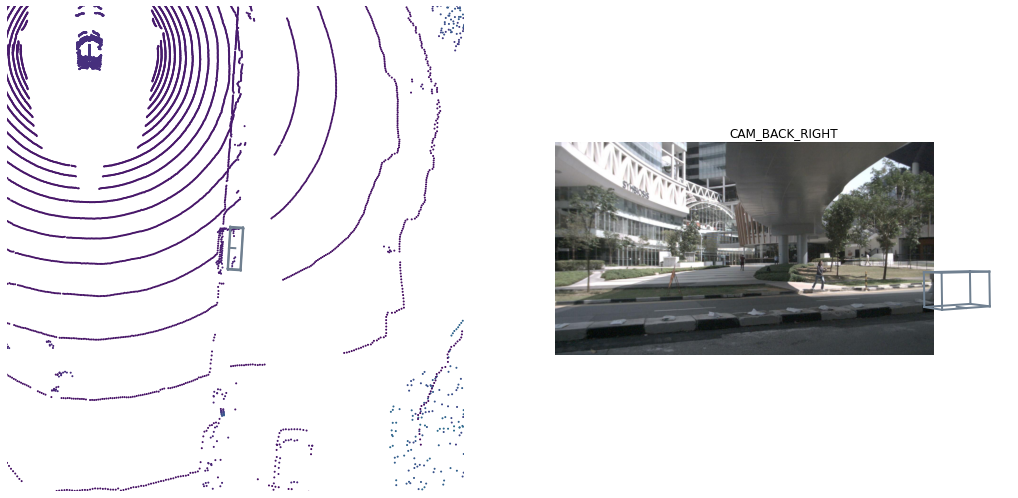

In [21]:
nusc.render_annotation(my_annotation_metadata['token'])


In [22]:
# 总共有911个token，然后标注物体一共是18538
nusc.instance.__len__()

911

In [23]:
my_instance = nusc.instance[599]
my_instance

{'token': '9cba9cd8af85487fb010652c90d845b5',
 'category_token': 'fedb11688db84088883945752e480c2c',
 'nbr_annotations': 16,
 'first_annotation_token': '77afa772cb4a4e5c8a5a53f2019bdba0',
 'last_annotation_token': '6fed6d902e5e487abb7444f62e1a2341'}

对于instance，nuScenes数据集会追踪其在一个场景的不同帧中的出现情况，但是不会跨越scenes对同一个instance进行追踪。从输出结果可以看到，对该instance，共进行了16次annotate。

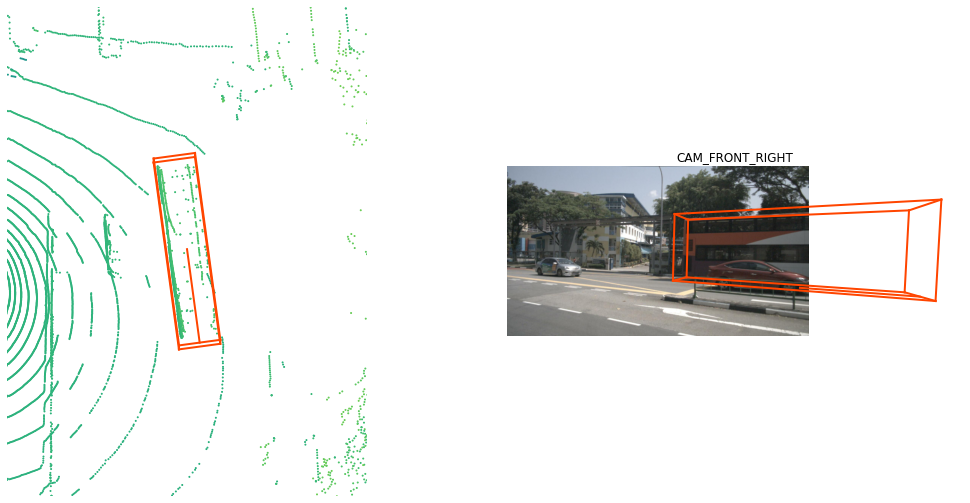

In [24]:
instance_token = my_instance['token']
nusc.render_instance(instance_token)

可以渲染该instance的first和last annotation看一下。

First annotated sample of this instance:
Last annotated sample of this instance


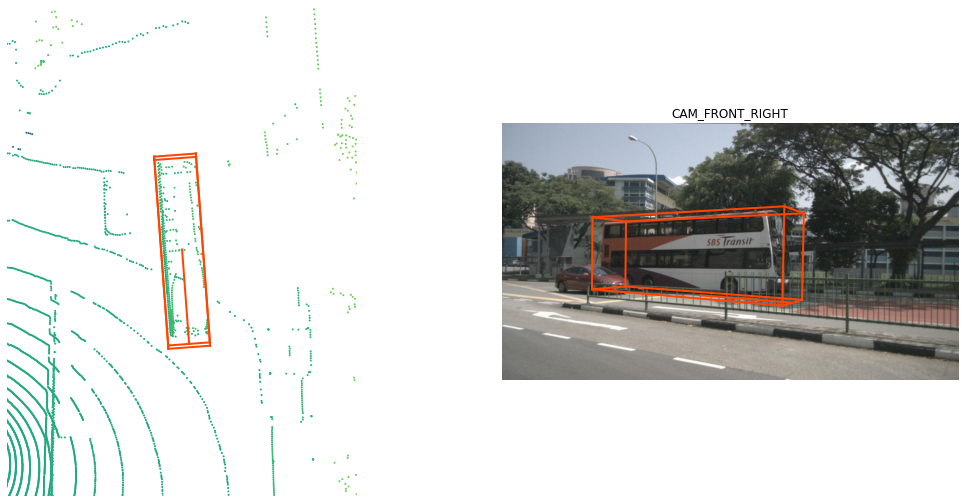

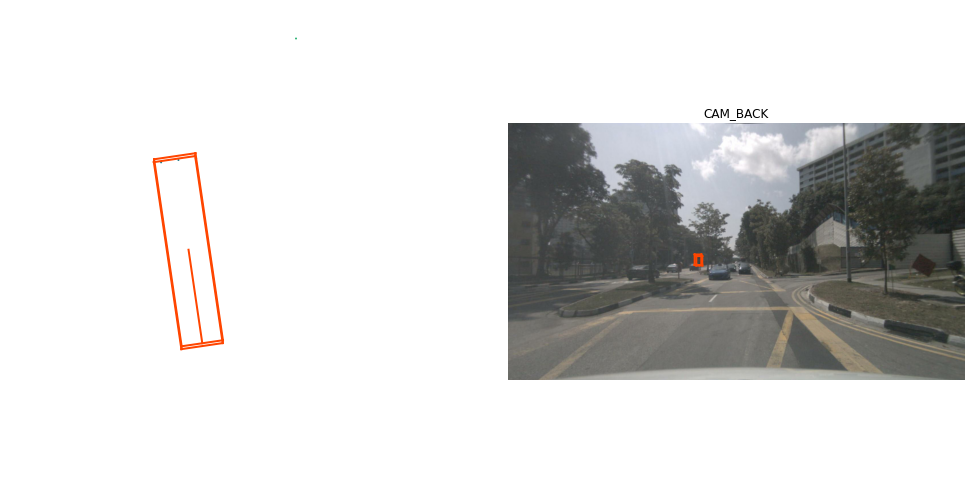

In [25]:
print("First annotated sample of this instance:")
nusc.render_annotation(my_instance['first_annotation_token'])

print("Last annotated sample of this instance")
nusc.render_annotation(my_instance['last_annotation_token'])


In [26]:
nusc.list_categories()


Category stats for split v1.0-mini:
human.pedestrian.adult      n= 4765, width= 0.68±0.11, len= 0.73±0.17, height= 1.76±0.12, lw_aspect= 1.08±0.23
human.pedestrian.child      n=   46, width= 0.46±0.08, len= 0.45±0.09, height= 1.37±0.06, lw_aspect= 0.97±0.05
human.pedestrian.constructi n=  193, width= 0.69±0.07, len= 0.74±0.12, height= 1.78±0.05, lw_aspect= 1.07±0.16
human.pedestrian.personal_m n=   25, width= 0.83±0.00, len= 1.28±0.00, height= 1.87±0.00, lw_aspect= 1.55±0.00
human.pedestrian.police_off n=   11, width= 0.59±0.00, len= 0.47±0.00, height= 1.81±0.00, lw_aspect= 0.80±0.00
movable_object.barrier      n= 2323, width= 2.32±0.49, len= 0.61±0.11, height= 1.06±0.10, lw_aspect= 0.28±0.09
movable_object.debris       n=   13, width= 0.43±0.00, len= 1.43±0.00, height= 0.46±0.00, lw_aspect= 3.35±0.00
movable_object.pushable_pul n=   82, width= 0.51±0.06, len= 0.79±0.10, height= 1.04±0.20, lw_aspect= 1.55±0.18
movable_object.trafficcone  n= 1378, width= 0.47±0.14, len= 0.45±0.07, heigh

In [27]:
nusc.list_attributes()


cycle.with_rider: 305
cycle.without_rider: 434
pedestrian.moving: 3875
pedestrian.sitting_lying_down: 111
pedestrian.standing: 1029
vehicle.moving: 2715
vehicle.parked: 4674
vehicle.stopped: 1545


## 通过以下代码进行查看同一个场景内attribute的变化

In [28]:
my_instance = nusc.instance[27]
my_instance

{'token': 'bbd6c47a20e34276bc6f2cfbc6ba6205',
 'category_token': '1fa93b757fc74fb197cdd60001ad8abf',
 'nbr_annotations': 39,
 'first_annotation_token': 'e4a3582721c34f528e3367f0bda9485d',
 'last_annotation_token': 'f97a9af2e14e4facbe5c07b139793964'}

In [29]:
first_token = my_instance['first_annotation_token']
last_token = my_instance['last_annotation_token']
nbr_samples = my_instance['nbr_annotations']
current_token = first_token

i = 0
found_change = False
while current_token != last_token:
    current_ann = nusc.get('sample_annotation', current_token)
    current_attr = nusc.get('attribute', current_ann['attribute_tokens'][0])['name']
    
    if i == 0:
        pass
    elif current_attr != last_attr:
        print("Changed from `{}` to `{}` at timestamp {} out of {} annotated timestamps".format(last_attr, current_attr, i, nbr_samples))
        found_change = True

    next_token = current_ann['next']
    current_token = next_token
    last_attr = current_attr
    i += 1


Changed from `pedestrian.moving` to `pedestrian.standing` at timestamp 21 out of 39 annotated timestamps


在总共39个标注的时间戳的第21个时间戳，attribute由pedestrian.moving 转变为 pedestrain.standing

## visibility用于定义某个annotation在相机拍摄的照片中的可见程度，分成四组。可用visibility查看。

In [30]:
nusc.visibility

[{'description': 'visibility of whole object is between 0 and 40%',
  'token': '1',
  'level': 'v0-40'},
 {'description': 'visibility of whole object is between 40 and 60%',
  'token': '2',
  'level': 'v40-60'},
 {'description': 'visibility of whole object is between 60 and 80%',
  'token': '3',
  'level': 'v60-80'},
 {'description': 'visibility of whole object is between 80 and 100%',
  'token': '4',
  'level': 'v80-100'}]

### 80-100%的可见性

Visibility: {'description': 'visibility of whole object is between 80 and 100%', 'token': '4', 'level': 'v80-100'}


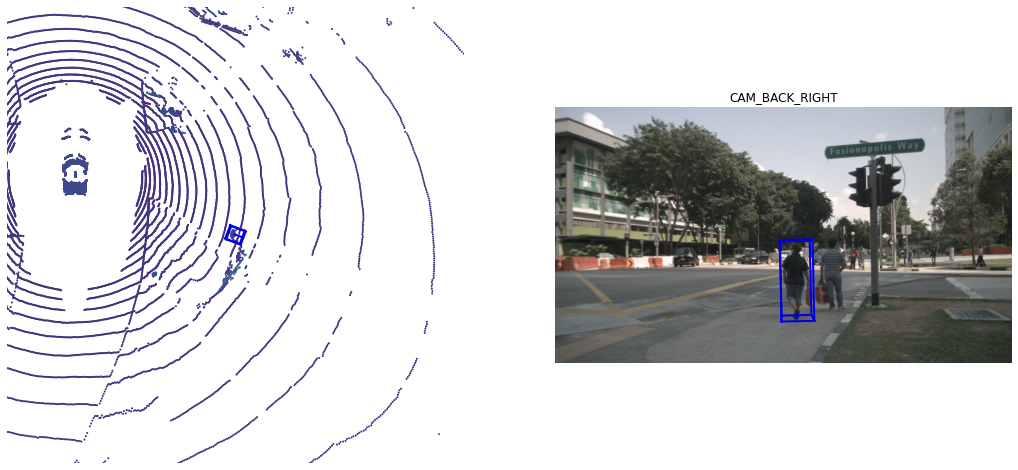

In [31]:

anntoken = 'a7d0722bce164f88adf03ada491ea0ba'
visibility_token = nusc.get('sample_annotation', anntoken)['visibility_token']

print("Visibility: {}".format(nusc.get('visibility', visibility_token)))
nusc.render_annotation(anntoken)



### 0-40%的可见性

Visibility: {'description': 'visibility of whole object is between 0 and 40%', 'token': '1', 'level': 'v0-40'}


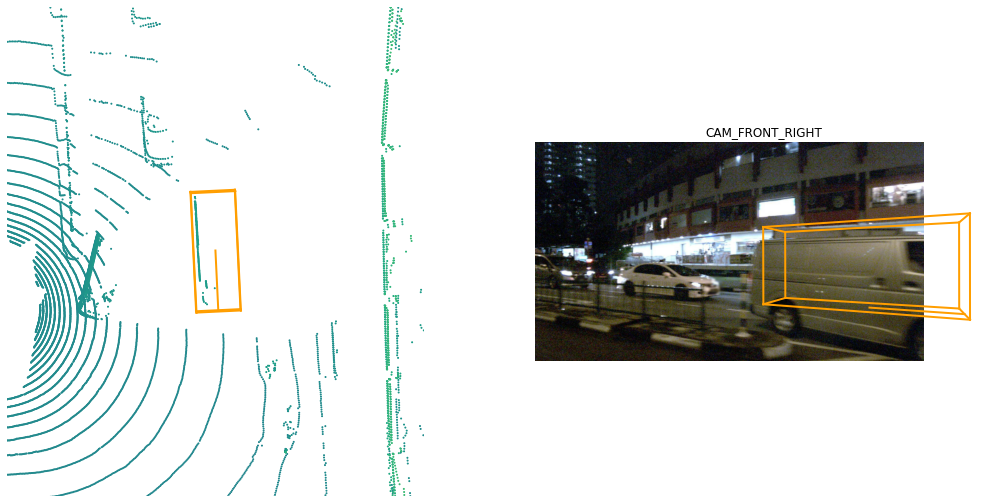

In [32]:
anntoken = '9f450bf6b7454551bbbc9a4c6e74ef2e'
visibility_token = nusc.get('sample_annotation', anntoken)['visibility_token']

print("Visibility: {}".format(nusc.get('visibility', visibility_token)))
nusc.render_annotation(anntoken)


## sensor传感器数据分析

In [33]:
nusc.sensor

[{'token': '725903f5b62f56118f4094b46a4470d8',
  'channel': 'CAM_FRONT',
  'modality': 'camera'},
 {'token': 'ce89d4f3050b5892b33b3d328c5e82a3',
  'channel': 'CAM_BACK',
  'modality': 'camera'},
 {'token': 'a89643a5de885c6486df2232dc954da2',
  'channel': 'CAM_BACK_LEFT',
  'modality': 'camera'},
 {'token': 'ec4b5d41840a509984f7ec36419d4c09',
  'channel': 'CAM_FRONT_LEFT',
  'modality': 'camera'},
 {'token': '2f7ad058f1ac5557bf321c7543758f43',
  'channel': 'CAM_FRONT_RIGHT',
  'modality': 'camera'},
 {'token': 'ca7dba2ec9f95951bbe67246f7f2c3f7',
  'channel': 'CAM_BACK_RIGHT',
  'modality': 'camera'},
 {'token': 'dc8b396651c05aedbb9cdaae573bb567',
  'channel': 'LIDAR_TOP',
  'modality': 'lidar'},
 {'token': '47fcd48f71d75e0da5c8c1704a9bfe0a',
  'channel': 'RADAR_FRONT',
  'modality': 'radar'},
 {'token': '232a6c4dc628532e81de1c57120876e9',
  'channel': 'RADAR_FRONT_RIGHT',
  'modality': 'radar'},
 {'token': '1f69f87a4e175e5ba1d03e2e6d9bcd27',
  'channel': 'RADAR_FRONT_LEFT',
  'modality'

## 标定数据

定义为在特定的车辆上校准的特定传感器（激光雷达/毫米波雷达/相机），所有的外部参数均是基于车辆自身坐标系。metadata的格式如下所示。

In [34]:
# calibrated_sensor= {
#    "token":                   //<str> -- Unique record identifier.
#    "sensor_token":            //<str> -- Foreign key pointing to the sensor type.
#    "translation":             //<float> [3] -- Coordinate system origin in meters: x, y, z.
#    "rotation":                //<float> [4] -- Coordinate system orientation as quaternion: w, x, y, z.
#    "camera_intrinsic":        //<float> [3, 3] -- Intrinsic camera calibration. Empty for sensors that are not cameras.
# }

In [35]:
nusc.ego_pose[0]

{'token': '5ace90b379af485b9dcb1584b01e7212',
 'timestamp': 1532402927814384,
 'rotation': [0.5731787718287827,
  -0.0015811634307974854,
  0.013859363182046986,
  -0.8193116095230444],
 'translation': [410.77878632230204, 1179.4673290964536, 0.0]}

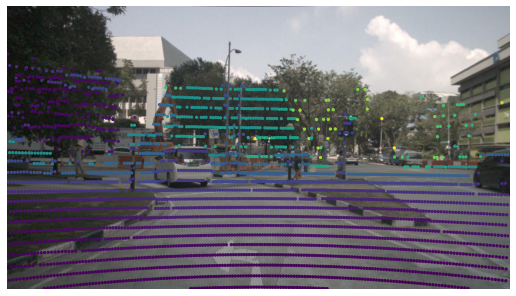

In [36]:
# 激光雷达绘制
my_sample = nusc.sample[10]
nusc.render_pointcloud_in_image(sample_token=my_sample['token'], pointsensor_channel='LIDAR_TOP')
# 将该sample的lidar点云绘制在图片上，图片是摄像机拍摄的


## 可以利用render_sample()将其所有的annotations全部绘制出来

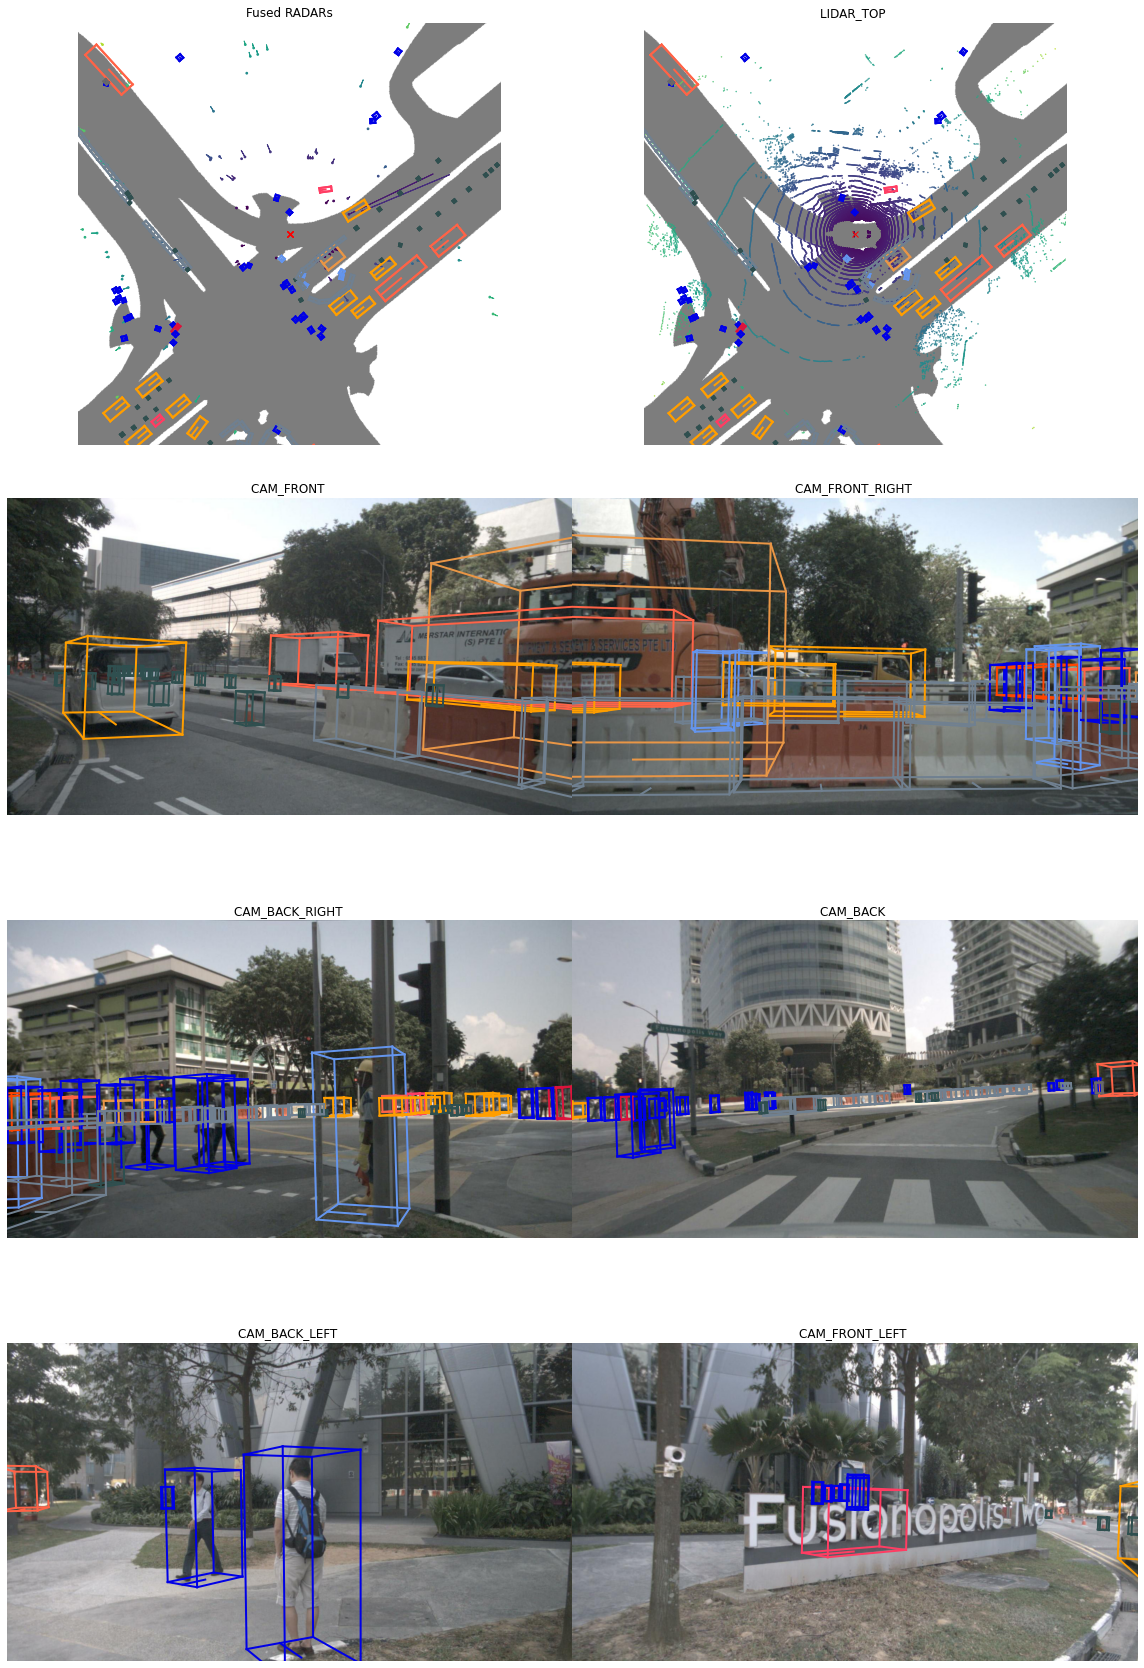

In [37]:
my_sample = nusc.sample[20]

# The rendering command below is commented out because it may crash in notebooks
nusc.render_sample(my_sample['token'])


# 输入可视化转换

In [38]:
data = nusc.get("sample", "965f6af5a92449348409029a5f048a38")
data

{'token': '965f6af5a92449348409029a5f048a38',
 'timestamp': 1532402938647444,
 'prev': 'fedfb3a6cb804635a0f47143f9ca8d6f',
 'next': '4711bcd34644420da8bc77163431888e',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '6eac77a424504b58a756d3ef121d803a',
  'RADAR_FRONT_LEFT': '6307a1a9109e4f609af84033dcd11660',
  'RADAR_FRONT_RIGHT': '40fbd397df714606ae34c561fcfad99f',
  'RADAR_BACK_LEFT': '1f658d2c3e4c427db183fc1d7a63ea88',
  'RADAR_BACK_RIGHT': 'a78cc7ca82f6444bbb919fc376e69636',
  'LIDAR_TOP': 'ea5b7cc72183440d88f625e81354ec74',
  'CAM_FRONT': 'addcad764798404b8141c9d40b413e73',
  'CAM_FRONT_RIGHT': '22a798fed5944a448190275f74f92abf',
  'CAM_BACK_RIGHT': '90003c07befe42debbbfdccc50b95bfc',
  'CAM_BACK': '45c0f6497b014d5b83ee167881e9dc7c',
  'CAM_BACK_LEFT': 'f3fb76859a4d460dab548155e7ce298d',
  'CAM_FRONT_LEFT': 'cea975f3a41c4026a528c180f8633917'},
 'anns': ['2b5948828cdb49e3be6be1320381bbbf',
  '853800e3937246e99ffeedfbd157b716',
  'd0ad50b01f1a4b14bd6cae0

In [39]:
imgs = []
rots = []
trans = []
intrins = []
post_rots = []
post_trans = []

In [40]:
import os
import cv2
import torch
from pyquaternion import Quaternion
import numpy as np
from PIL import Image
from pyquaternion import Quaternion
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.splits import create_splits_scenes
from nuscenes.utils.data_classes import Box
from glob import glob

In [41]:
nepochs=10000,
gpuid=1,
H=900,  # 图片大小
W=1600,
resize_lim=(0.193, 0.225),    # resize的范围
final_dim=(128, 352),         # 数据预处理之后图片最后的尺寸
bot_pct_lim=(0.0, 0.22),      # 裁剪图片时，图像底部裁减掉部分所占的比例
rot_lim=(-5.4, 5.4),          # 训练时旋转图片的角度范围
rand_flip=True,               # 随机翻转
ncams=5,                      # 摄像机通道数
max_grad_norm=5.0,
pos_weight=2.13,              # 损失函数中给正样本项损失乘的权重系数
logdir='./runs',              # 日志的输出文件

xbound=[-50.0, 50.0, 0.5],    # 限制x的方向范围并进行划分网格
ybound=[-50.0, 50.0, 0.5],    # 限制y的方向范围并进行划分网格
zbound=[-10.0, 10.0, 20.0],   # 限制z的方向范围并进行划分网格
dbound=[4.0, 45.0, 1.0],      # 限制深度方向范围并进行划分网格
        
    
grid_conf = {                       # 网格配置
        'xbound': [-50.0, 50.0, 0.5],
        'ybound': [-50.0, 50.0, 0.5],
        'zbound': [-10.0, 10.0, 20.0],   # 限制z的方向范围并进行划分网格,
        'dbound': [4.0, 45.0, 1.0],      # 限制深度方向范围并进行划分网格,
    }
data_aug_conf = {                   # 数据增强配置
    'resize_lim': (0.193, 0.225),    # resize的范围,
    'final_dim': (128, 352),
    'rot_lim': (-5.4, 5.4),          # 训练时旋转图片的角度范围,
    'H': 900, 'W': 1600,
    'rand_flip': True,
    'bot_pct_lim': (0.0, 0.22),      # 裁剪图片时，图像底部裁减掉部分所占的比例,
    'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT',
             'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'],
    'Ncams': ncams,
}

In [42]:
cams = ['CAM_FRONT','CAM_FRONT_RIGHT','CAM_BACK_LEFT', 'CAM_FRONT_LEFT','CAM_BACK']

In [43]:
def sample_augmentation():
    H, W = data_aug_conf['H'], data_aug_conf['W']
    fH, fW = data_aug_conf['final_dim']
    print(fH, fW)
    if is_train:
        resize = np.random.uniform(*data_aug_conf['resize_lim'])   # 随机取resize的一个范围
        resize_dims = (int(W * resize), int(H * resize))
        newW, newH = resize_dims
        crop_h = int((1 - np.random.uniform(*data_aug_conf['bot_pct_lim'])) * newH) - fH
        crop_w = int(np.random.uniform(0, max(0, newW - fW)))
        crop = (crop_w, crop_h, crop_w + fW, crop_h + fH)
        flip = False
        if data_aug_conf['rand_flip'] and np.random.choice([0, 1]):
            flip = True
        rotate = np.random.uniform(*data_aug_conf['rot_lim'])
    else:
        resize = max(fH / H, fW / W)
        resize_dims = (int(W * resize), int(H * resize))
        newW, newH = resize_dims
        crop_h = int((1 - np.mean(data_aug_conf['bot_pct_lim'])) * newH) - fH
        crop_w = int(max(0, newW - fW) / 2)
        crop = (crop_w, crop_h, crop_w + fW, crop_h + fH)
        flip = False
        rotate = 0
    return resize, resize_dims, crop, flip, rotate

In [44]:
def get_rot(h):
    return torch.Tensor([
        [np.cos(h), np.sin(h)],
        [-np.sin(h), np.cos(h)],
    ])

In [45]:
def img_transform(img, post_rot, post_tran,
                  resize, resize_dims, crop,
                  flip, rotate):
    # adjust image
    img = img.resize(resize_dims)
    img = img.crop(crop)
    if flip:
        img = img.transpose(method=Image.FLIP_LEFT_RIGHT)
    img = img.rotate(rotate)

    #
    post_rot *= resize
    post_tran -= torch.Tensor(crop[:2])
    if flip:
        A = torch.Tensor([[-1, 0], [0, 1]])
        b = torch.Tensor([crop[2] - crop[0], 0])
        post_rot = A.matmul(post_rot)
        post_tran = A.matmul(post_tran) + b
    A = get_rot(rotate/180*np.pi)
    b = torch.Tensor([crop[2] - crop[0], crop[3] - crop[1]]) / 2
    b = A.matmul(-b) + b
    post_rot = A.matmul(post_rot)
    post_tran = A.matmul(post_tran) + b

    return img, post_rot, post_tran


In [46]:
data_aug_conf['final_dim']

(128, 352)

In [47]:
import torchvision
normalize_img = torchvision.transforms.Compose((
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
))

In [48]:
rec = data
is_train = True
for cam in cams:
    samp = nusc.get('sample_data', rec['data'][cam])  # 拿到该摄像头的token对应的数据
    imgname = os.path.join(nusc.dataroot, samp['filename'])
    img = Image.open(imgname)
    post_rot = torch.eye(2)
    post_tran = torch.zeros(2)
    # 获取该摄像头的标定数据
    sens = nusc.get('calibrated_sensor', samp['calibrated_sensor_token'])
    intrin = torch.Tensor(sens['camera_intrinsic'])  # 拿到相机的内参
    rot = torch.Tensor(Quaternion(sens['rotation']).rotation_matrix)  # 传感器的旋转参角
    tran = torch.Tensor(sens['translation'])  # 相加外参，偏移矩阵

    # augmentation (resize, crop, horizontal flip, rotate)
    resize, resize_dims, crop, flip, rotate = sample_augmentation()  # 数据增强
    img, post_rot2, post_tran2 = img_transform(img, post_rot, post_tran,
                                               resize=resize,
                                               resize_dims=resize_dims,
                                               crop=crop,
                                               flip=flip,
                                               rotate=rotate,
                                               )

    # for convenience, make augmentation matrices 3x3
    post_tran = torch.zeros(3)
    post_rot = torch.eye(3)
    post_tran[:2] = post_tran2
    post_rot[:2, :2] = post_rot2

    imgs.append(normalize_img(img))
    intrins.append(intrin)
    rots.append(rot)
    trans.append(tran)
    post_rots.append(post_rot)
    post_trans.append(post_tran)

128 352
128 352
128 352
128 352
128 352


In [49]:
cam = 'CAM_FRONT'
samp = nusc.get('sample_data', rec['data'][cam])  # 拿到该摄像头的token对应的数据

In [50]:
samp

{'token': 'addcad764798404b8141c9d40b413e73',
 'sample_token': '965f6af5a92449348409029a5f048a38',
 'ego_pose_token': 'addcad764798404b8141c9d40b413e73',
 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1',
 'timestamp': 1532402938612460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402938612460.jpg',
 'prev': '0d4dc5ed0fae4e87a7fde52b10236768',
 'next': 'b49533cb3fde4929b7d2ada9bd810d0a',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

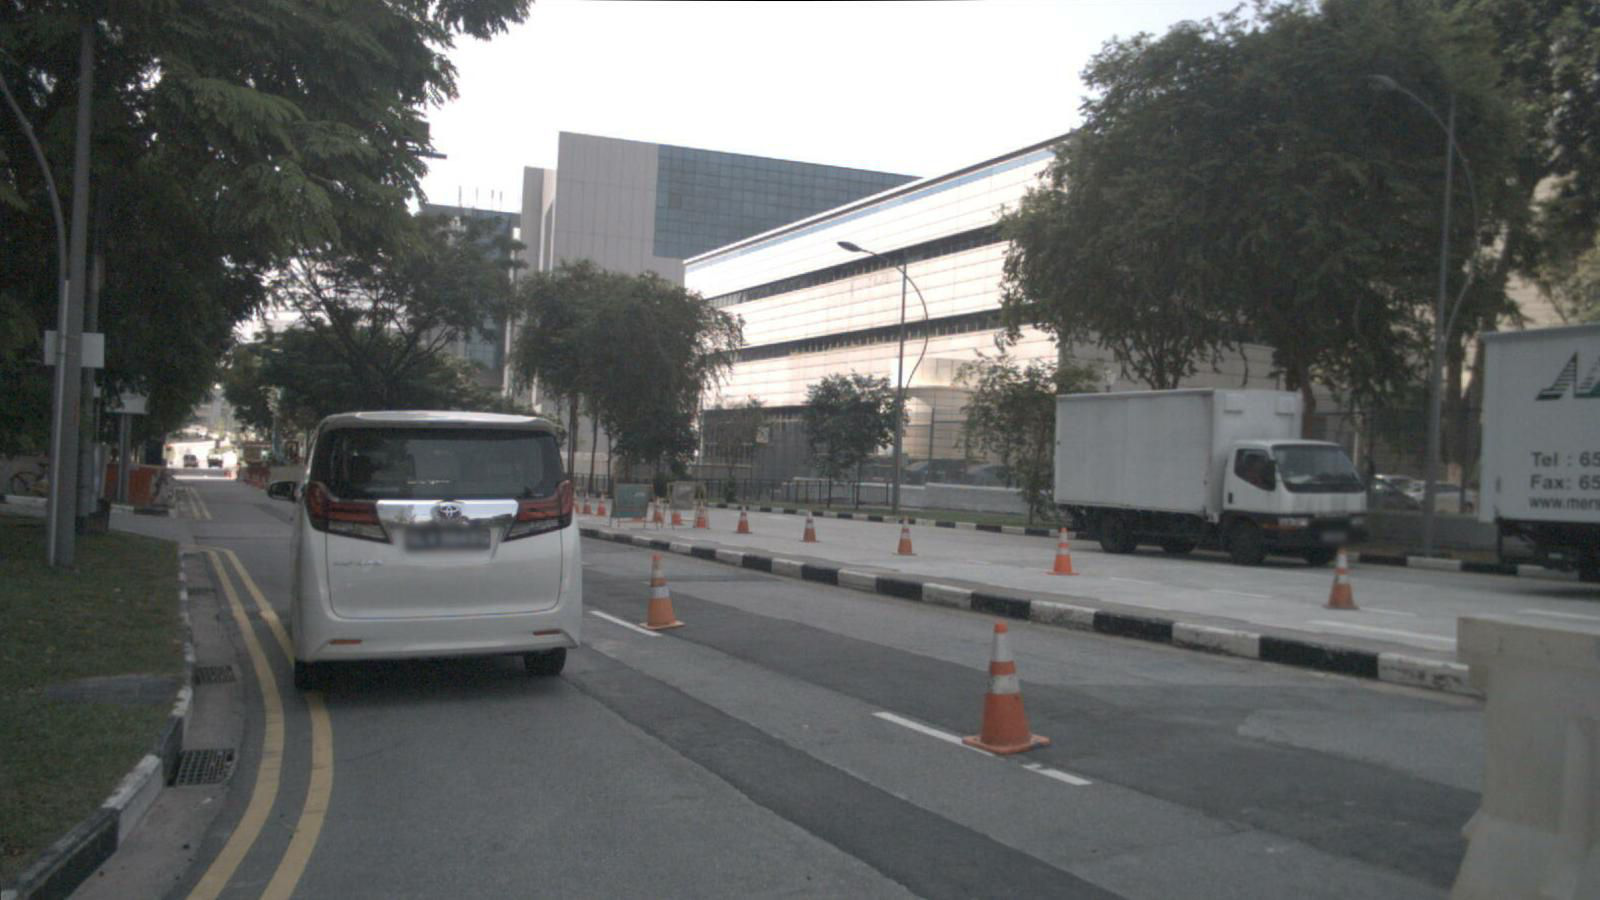

In [51]:
imgname = os.path.join(nusc.dataroot, samp['filename'])
img = Image.open(imgname)
img

In [52]:
# 参数设定
post_rot = torch.eye(2)
post_tran = torch.zeros(2)
print('post_rot:\n', post_rot)
print('post_tran:\n', post_tran)
# 获取该摄像头的标定数据
sens = nusc.get('calibrated_sensor', samp['calibrated_sensor_token'])

post_rot:
 tensor([[1., 0.],
        [0., 1.]])
post_tran:
 tensor([0., 0.])


In [53]:
# 打印标定文件
sens

{'token': '1d31c729b073425e8e0202c5c6e66ee1',
 'sensor_token': '725903f5b62f56118f4094b46a4470d8',
 'translation': [1.70079118954, 0.0159456324149, 1.51095763913],
 'rotation': [0.4998015430569128,
  -0.5030316162024876,
  0.4997798114386805,
  -0.49737083824542755],
 'camera_intrinsic': [[1266.417203046554, 0.0, 816.2670197447984],
  [0.0, 1266.417203046554, 491.50706579294757],
  [0.0, 0.0, 1.0]]}

In [54]:
intrin = torch.Tensor(sens['camera_intrinsic'])  # 拿到相机的内参

In [55]:
# 相机内参
intrin 

tensor([[1.2664e+03, 0.0000e+00, 8.1627e+02],
        [0.0000e+00, 1.2664e+03, 4.9151e+02],
        [0.0000e+00, 0.0000e+00, 1.0000e+00]])

In [56]:
# 相机旋转四元数
sens['rotation']

[0.4998015430569128,
 -0.5030316162024876,
 0.4997798114386805,
 -0.49737083824542755]

In [57]:
# 传感器的旋转矩阵
rot = torch.Tensor(Quaternion(sens['rotation']).rotation_matrix)  
rot

tensor([[ 5.6848e-03, -5.6367e-03,  9.9997e-01],
        [-9.9998e-01, -8.3712e-04,  5.6801e-03],
        [ 8.0507e-04, -9.9998e-01, -5.6413e-03]])

In [58]:
# 相加外参，平移矩阵
tran = torch.Tensor(sens['translation'])
tran

tensor([1.7008, 0.0159, 1.5110])

In [59]:
# augmentation (resize, crop, horizontal flip, rotate)
resize, resize_dims, crop, flip, rotate = sample_augmentation()  # 数据增强
print(resize, resize_dims, crop, flip, rotate)

128 352
0.21767880962646918 (348, 195) (0, 47, 352, 175) True 4.140906930506279


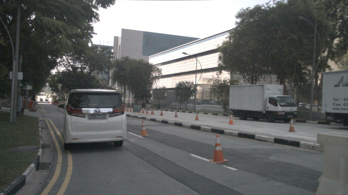

In [60]:
img = img.resize(resize_dims)  # 图像缩放
img

In [61]:
img = img.crop(crop)  # 图像裁剪
img.size

(352, 128)

In [62]:
if flip:
    img = img.transpose(method=Image.FLIP_LEFT_RIGHT)  # 左右翻转

img = img.rotate(rotate)  # 旋转
img.size

(352, 128)

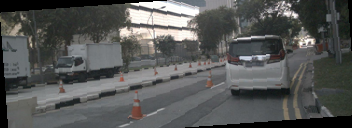

In [63]:
img

In [64]:
# post-homography transformation

# 数据增强后的图像上的某一点的坐标需要对应回增强前的坐标
post_rot *= resize  # [[0.22,0],[0,0.22]]
post_tran -= torch.Tensor(crop[:2])  # [0,-48]
print(resize)
print(post_rot)

0.21767880962646918
tensor([[0.2177, 0.0000],
        [0.0000, 0.2177]])


In [65]:
if flip:
    A = torch.Tensor([[-1, 0], [0, 1]])
    b = torch.Tensor([crop[2] - crop[0], 0])
    post_rot = A.matmul(post_rot)
    post_tran = A.matmul(post_tran) + b
A = get_rot(rotate/180*np.pi)  # 得到数据增强时旋转操作的旋转矩阵
b = torch.Tensor([crop[2] - crop[0], crop[3] - crop[1]]) / 2  # 裁剪保留部分图像的中心坐标 (176, 64)
b = A.matmul(-b) + b  # 0
post_rot = A.matmul(post_rot)
post_tran = A.matmul(post_tran) + b

In [66]:
img, post_rot2, post_tran2 = img_transform(img, post_rot, post_tran,
                                           resize=resize,
                                           resize_dims=resize_dims,
                                           crop=crop,
                                           flip=flip,
                                           rotate=rotate,
                                           )


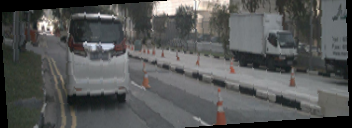

In [67]:
# 对图形进行转换之后
img

In [68]:
# for convenience, make augmentation matrices 3x3
# 把上面平移 & 旋转矩阵转换为3x3的数组
post_tran = torch.zeros(3)
post_rot = torch.eye(3)
post_tran[:2] = post_tran2
post_rot[:2, :2] = post_rot2

In [69]:
imgs.append(normalize_img(img))
intrins.append(intrin)
rots.append(rot)
trans.append(tran)
post_rots.append(post_rot)
post_trans.append(post_tran)

## get_binimg

In [70]:
rec

{'token': '965f6af5a92449348409029a5f048a38',
 'timestamp': 1532402938647444,
 'prev': 'fedfb3a6cb804635a0f47143f9ca8d6f',
 'next': '4711bcd34644420da8bc77163431888e',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '6eac77a424504b58a756d3ef121d803a',
  'RADAR_FRONT_LEFT': '6307a1a9109e4f609af84033dcd11660',
  'RADAR_FRONT_RIGHT': '40fbd397df714606ae34c561fcfad99f',
  'RADAR_BACK_LEFT': '1f658d2c3e4c427db183fc1d7a63ea88',
  'RADAR_BACK_RIGHT': 'a78cc7ca82f6444bbb919fc376e69636',
  'LIDAR_TOP': 'ea5b7cc72183440d88f625e81354ec74',
  'CAM_FRONT': 'addcad764798404b8141c9d40b413e73',
  'CAM_FRONT_RIGHT': '22a798fed5944a448190275f74f92abf',
  'CAM_BACK_RIGHT': '90003c07befe42debbbfdccc50b95bfc',
  'CAM_BACK': '45c0f6497b014d5b83ee167881e9dc7c',
  'CAM_BACK_LEFT': 'f3fb76859a4d460dab548155e7ce298d',
  'CAM_FRONT_LEFT': 'cea975f3a41c4026a528c180f8633917'},
 'anns': ['2b5948828cdb49e3be6be1320381bbbf',
  '853800e3937246e99ffeedfbd157b716',
  'd0ad50b01f1a4b14bd6cae0

In [71]:
egopose = nusc.get('ego_pose', nusc.get('sample_data', rec['data']['LIDAR_TOP'])['ego_pose_token'])

In [72]:
egopose

{'token': 'ea5b7cc72183440d88f625e81354ec74',
 'timestamp': 1532402938647444,
 'rotation': [0.906217541548088,
  -0.02300991165867209,
  0.010884838760769606,
  -0.4220448218390451],
 'translation': [401.0653931407355, 1115.6784191807697, 0.0]}

In [73]:
trans = -np.array(egopose['translation'])  # 平移
rot = Quaternion(egopose['rotation']).inverse  # 旋转
img = np.zeros((200, 200))  # 200, 200的网格

In [74]:
print(trans)
print(rot)
print(img)

[ -401.06539314 -1115.67841918    -0.        ]
0.906 +0.023i -0.011j +0.422k
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [75]:
dx=[0.5, 0.5, 20]
bx=[-49.75, -49.75, 0]
nx=[200, 200, 1]
dx = np.array(dx)
bx = np.array(bx)
nx = np.array(nx)

In [76]:
dx[:2]

array([0.5, 0.5])

In [78]:
for tok in rec['anns']:  # 遍历该sample的每个annotation token
    inst = nusc.get('sample_annotation', tok)  # 找到该annotation
    # add category for lyft
    if not inst['category_name'].split('.')[0] == 'vehicle':  # 只关注车辆
        continue
    box = Box(inst['translation'], inst['size'], Quaternion(inst['rotation']))  # 参数分别为center, size, orientation
    box.translate(trans)  # 将box的center坐标从全局坐标系转换到自车坐标系下
    box.rotate(rot)  # 将box的center坐标从全局坐标系转换到自车坐标系下

    pts = box.bottom_corners()[:2].T  # 三维边界框取底面的四个角的(x,y)值后转置, 4x2
    pts = np.round((pts - bx[:2] + dx[:2] / 2.0) / dx[:2]).astype(np.int32) 
    # 将box的实际坐标对应到网格坐标，同时将坐标范围[-50,50]平移到[0,100]
    pts[:, [1, 0]] = pts[:, [0, 1]]  # 把(x,y)的形式换成(y,x)的形式
    cv2.fillPoly(img, [pts], 1.0)  # 在网格中画出box
#     cv2.imshow("img", img)
    cv2.imshow("Image_%s"%tok, img) 
    cv2.waitKey (0)
    cv2.destroyAllWindows()

In [82]:
bx

array([-49.75, -49.75,   0.  ])

In [84]:
dx

array([ 0.5,  0.5, 20. ])

In [85]:
(0 - bx[:2] + dx[:2] / 2)/dx[:2]

array([100., 100.])

In [90]:
 xs = torch.linspace(0, 352 - 1, 22, dtype=torch.float)

In [94]:
 ys = torch.linspace(0, 128 - 1, 8, dtype=torch.float)

In [95]:
xs

tensor([  0.0000,  16.7143,  33.4286,  50.1429,  66.8571,  83.5714, 100.2857,
        117.0000, 133.7143, 150.4286, 167.1429, 183.8571, 200.5714, 217.2857,
        234.0000, 250.7143, 267.4286, 284.1429, 300.8571, 317.5714, 334.2857,
        351.0000])

In [96]:
ys

tensor([  0.0000,  18.1429,  36.2857,  54.4286,  72.5714,  90.7143, 108.8571,
        127.0000])